# EDA Project: Seattle Airbnb Data

## 0. Set-up

In [77]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, log_loss

In [78]:
# Configure settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.options.display.max_colwidth = 200

%matplotlib inline

## 1. Introduction, business understanding, and problem statements

This notebook covers an exploration of a Kaggle dataset, 'Seattle Airbnb Open Data' [0].

We'll use this notebook to explore the data and attempt to answer a number of questions from it. 

I'm particularly interested in the nature and impact of guest reviews. Focusing on this topic, we'll explore three questions related to this data set:

<b>1. How can we group and categorize review text in the data set based on sentiment?</b>

Specifically, I'm interested here in what proportion of reviews might be classed as positive, neutral, or negative based on sentiment analysis.

<b>2. How do localities vary in positive or negative sentiment in review descriptions?</b>

Building on the above question, we'll explore here which neighbourhoods (if any) appear to generate disproportionately positive sentiment from guests. We'll review here the distribution of positive sentiment by locality, and observe how closely it mirrors the distribution of reviews by locality overall.  

<b>3. Which features are most predictive of positive review scores?</b>

Here we'll aim to fit a model to predict positive review scores, using features in the listings data set. We'll explore which of these features make the biggest impact in predicting average review scores. 


---


Before attempting to answer these questions, however, we'll perform an initial review and preparation of the data set in question.

[0] https://www.kaggle.com/airbnb/seattle/downloads/seattle.zip/2#reviews.csv

## 2. Data Exploration

We'll now move on to explore the data set, and to reach an understanding of the structure and characteristics of the data we're working with. We'll proceed through each of the data files sequentially.

### 2.1. Listings file

Let's begin by reading and understanding some basic characteristics of the listings data file. Based on the Kaggle description, we know already roughly what this dataframe will contain - details on a number of Airbnb properties listed in Seattle.

In [79]:
# Import the data file
listings_raw_df = pd.read_csv('data/listings.csv', sep = ',') 

In [80]:
# Print the dimensions of the data file
listings_raw_df.shape

(3818, 92)

In [81]:
# Print details of the columns in the data file
listings_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [82]:
# Print a sample of rows from the data file
listings_raw_df.sample(n = 300)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1299,217142,https://www.airbnb.com/rooms/217142,20160104002432,2016-01-04,SPACIOUS 2BD/2BA PRKG FREE WiFi,Check the calendar for mid week sales and one night only deals!,COMPLETELY RENOVATED! Luxurious and spacious condominium (over 900 square feet) with 2 bathrooms in Seattle's best location. We purchased this condo in 2011 and had it completely renovated by an i...,Check the calendar for mid week sales and one night only deals! COMPLETELY RENOVATED! Luxurious and spacious condominium (over 900 square feet) with 2 bathrooms in Seattle's best location. We pur...,none,NaN,We have a minimum age requirement of 26 for any guest not accompanied by a parent. We have a 3 night minimum for stays over a weekend. If the reservation is within a week we will accept a 2 night ...,NaN,https://a0.muscache.com/ac/pictures/2113999/5f0fcb98_original.jpg?interpolation=lanczos-none&size=small&output-format=jpg&output-quality=70,https://a0.muscache.com/im/pictures/2113999/5f0fcb98_original.jpg?aki_policy=medium,https://a0.muscache.com/ac/pictures/2113999/5f0fcb98_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,https://a0.muscache.com/ac/pictures/2113999/5f0fcb98_original.jpg?interpolation=lanczos-none&size=x_large_cover&output-format=jpg&output-quality=70,8243075,https://www.airbnb.com/users/show/8243075,Autumn,2013-08-18,US,I am a friendly and helpful Seattle resident working in property management. I'm easy going but meticulous and committed to providing exceptional service. I take pride in making people feel welc...,within a few hours,100%,100%,f,"https://a1.muscache.com/ac/users/8243075/profile_pic/1377710851/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70","https://a1.muscache.com/ac/users/8243075/profile_pic/1377710851/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=225:*&output-format=jpg&output-quality=70",Belltown,4.0,4.0,"['email', 'phone', 'reviews', 'jumio']",t,t,"2nd Ave, Seattle, WA 98121, United States",Belltown,Belltown,Downtown,Seattle,WA,98121,Seattle,"Seattle, WA",US,United States,47.615339,-122.347905,t,Apartment,Entire home/apt,7,2.0,2.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",""Wheelchair Accessible"",Pool,Kitchen,""Free Parking on Premises"",Gym,""Elevator in Building"",""Hot Tub"",""Buzzer/Wireless Intercom"",Heati...",NaN,$200.00,"$1,530.00","$4,900.00",$100.00,$105.00,1,$0.00,2,365,2 weeks ago,t,11,37,67,330,2016-01-04,47,2011-10-21,2016-01-02,95.0,10.0,10.0,10.0,10.0,10.0,9.0,f,NaN,WA

We can see immediately that the listings data is quite rich in features, albeit not hugely numerous in observations (i.e. rows).

We have 92 columns in the file. While some reflect metadata on the properties themselves (user IDs, URLs, scrape dates, and so on), the majority of these columns are features that could be useful for analysis. These features include property location, number of bedrooms, amenities, and many more. 

Two attributes seem particularly useful as potential target variables for analysis - price and average review scores. We're going to focus on the latter for our analysis.

There seem to be some new variables we could extract here, too. The 'amenities' field in particular contains within it several potential new binary variables (indicating e.g. the presence or absence of a TV, or Internet). 

We can see from this initial print-outs however that there are some data quality issues overall - notably a number of null fields. Let's now explore potential issues in the dataframe, and determine potential data preparation we'll need to do.

In [83]:
# Count and display columns with highest volume of null values
percent_missing = listings_raw_df.isnull().sum() * 100 / len(listings_raw_df)
listings_raw_missing = pd.DataFrame({'column_name': listings_raw_df.columns,
                                 'percent_missing': percent_missing})
listings_raw_missing.sort_values('percent_missing', inplace=True, ascending=False)
listings_raw_missing

,column_name,percent_missing
license,license,100.000000
square_feet,square_feet,97.459403
monthly_price,monthly_price,60.267156
security_deposit,security_deposit,51.126244
weekly_price,weekly_price,47.380828
notes,notes,42.063908
neighborhood_overview,neighborhood_overview,27.029859
cleaning_fee,cleaning_fee,26.977475
transit,transit,24.463070
host_about,host_about,22.498690


In [84]:
# Print detail of license variable
listings_raw_df['license'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: license, dtype: float64

In [85]:
# Explore volume of license requirements in the data set
listings_raw_df['requires_license'].value_counts()

f    3818
Name: requires_license, dtype: int64

In [86]:
# Print detail of square footage variable
listings_raw_df['square_feet'].describe()

count      97.000000
mean      854.618557
std       671.404893
min         0.000000
25%       420.000000
50%       750.000000
75%      1200.000000
max      3000.000000
Name: square_feet, dtype: float64

We can see a number of issues here, which we can validate by the printed sample of rows above. They fall into a number of categories. 

To begin with, there are a number of variables that have a material-but-manageable number of null values (< 25%). We'll need to plan carefully how to treat these, but it seems very likely we'll be able to keep these in our data set. 

Four variables have more entries missing (40 - 60%). We may well be able to retain some of these features, but we should handle them with much more care.

Lastly, two variables are at or close to 100% nulls (square_feet and license). In the case of licenses, it seems to be a redundant variable in practice - none of the observations have a license, but none require a license (all rows are marked as 'f' for false on the requires_license variable). 

Square footage just seems to be seldom included for our listings. We *might* be able to make use of this variable, but we'll at best be able to transform it into a boolean to indicate presence/absence (i.e., to capture whether or not a property has included a square footage measure or not). 

### 2.2. Calendar file

We'll now move on to explore the calendar file, and perform a similar initial exploration.

In [87]:
# Import the data file
calendar_raw_df = pd.read_csv('data/calendar.csv', sep = ',')

In [88]:
# Print the dimensions of the data file
calendar_raw_df.shape

(1393570, 4)

In [89]:
# Print details of the columns in the data file
calendar_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [90]:
# Print a sample of rows from the data file
calendar_raw_df.sample(n = 300)

,listing_id,date,available,price
346069,3024336,2016-02-22,t,$200.00
70921,9367465,2016-04-24,t,$150.00
707457,7800238,2016-03-31,t,$85.00
735318,7674720,2016-07-30,t,$51.00
919245,2459519,2016-06-27,t,$750.00
1134381,4951079,2016-11-25,t,$72.00
347264,3970736,2016-06-01,t,$120.00
442566,5736082,2016-07-08,t,$45.00
1374475,9262389,2016-09-10,f,NaN
1194306,4092037,2016-01-30,t,$250.00


In [91]:
# Count and display columns with highest volume of null values
percent_missing = calendar_raw_df.isnull().sum() * 100 / len(calendar_raw_df)
calendar_raw_df_missing = pd.DataFrame({'column_name': calendar_raw_df.columns,
                                 'percent_missing': percent_missing})
calendar_raw_df_missing.sort_values('percent_missing', inplace=True, ascending=False)
calendar_raw_df_missing

,column_name,percent_missing
price,price,32.938998
listing_id,listing_id,0.000000
date,date,0.000000
available,available,0.000000


In [92]:
# Print a null count grouped by whether a property is available or not
calendar_raw_df['price'].isnull().groupby(calendar_raw_df['available']).sum().to_dict()

{'f': 459028.0, 't': 0.0}

This data file is more straightforward than listings. It's a far larger data file with far more observations (though far fewer columns). It links through to listings based on a foreign_key on listing_id. 

The only null values present are on price. While the null count might seem concerning (~33% of entries), it looks like nulls are only present where a property is listed as unavailable. In other words, for all entries where a property is actually live and listed, we can see it's price point. For any analysis on price, we'd be able to reasonably remove these entries. 

### 2.3. Reviews file

Lastly, let's perform some exploration on the reviews data file. 

In [93]:
# Import the data file
reviews_raw_df = pd.read_csv('data/reviews.csv', sep = ',') 

In [94]:
# Print the dimensions of the data file
reviews_raw_df.shape

(84849, 6)

In [95]:
# Print details of the columns in the data file
reviews_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [96]:
# Print a sample of rows from the data file
reviews_raw_df.sample(n = 300)

,listing_id,id,date,reviewer_id,reviewer_name,comments
4067,456040,38852813,2015-07-19,34393858,Colette,Chantel's place was very nice and relaxing. It is situated in a very cute neighborhood. Be aware that there is another room that people may be staying in. But this is a wonderful place to stay if ...
50707,6482409,43372465,2015-08-19,12179723,Tim,"Matt and Akiko were among the most hospitable AirBnB hosts I've met, helpful in practical ways and welcoming in the sense of inviting us to dinner with them. The neighborhood is fascinating, full ..."
57576,1494828,24927226,2015-01-04,6031356,Sue,William is a very gracious and responsive host. He responded to my emails quickly and was most accommodating when I requested an early check in. The apartment is lovely and well-stocked. Everyt...
12960,1733747,51526512,2015-10-21,15876691,John,"I really enjoyed my stay at Mandy's place. Her sister was very accommodating, the location was very convenient, the neighbors were nice, and the place was really clean. To stay in such a great p..."
21544,392140,2920376,2012-11-19,4042301,Travis,Amazing View! Very charming home and a wonderful host! She was very helpful in finding where to catch the local transit system and was happy to help! Everything went on without a hitch! Leslie has...
37261,4660460,39485585,2015-07-24,26976636,Kirk,"The perfect space for our seattle getaway. Extremely clean and provided the necessities to feel welcome and at home. Easily accessible to everywhere we wanted to go, great for tourists. Hosts were..."
9352,5175464,44744274,2015-08-28,42627222,Ed,My girlfriend and I requested a stay at this studio at the last minute during a trip to Seattle. Samantha was very gracious and got the place ready for us with little notice.\n\nThe location of th...
51118,4030640,38545862,2015-07-16,37583201,Laura,"Lisa's communications in advance of our arrival were fantastic. Great directions and contact info provided.\r\nWarm welcome after our late arrival and long flight, only 20min drive from SEA and 15..."
56011,53867,1930488,2012-08-09,130230,Maya,"Das Cottage ist ideal in einem schönen Vorort von Seattle gelegen. Ein tolles Frühstücksdiner nur ein paar Häuser entfernt. Die Gastgeber sind sehr auf unsere Wünsche eingegangen, alles war sauber..."
70777,3561237,37247599,2015-07-05,36982280,Heath,"This house was awesome. It's big, modern, comfortable and immaculately clean. Jan was the perfect host and always available if/when you needed her. Magnolia is such a beautiful and convenient lo..."


In [97]:
# Count and display columns with highest volume of null values
percent_missing = reviews_raw_df.isnull().sum() * 100 / len(reviews_raw_df)
reviews_raw_df_missing = pd.DataFrame({'column_name': reviews_raw_df.columns,
                                 'percent_missing': percent_missing})
reviews_raw_df_missing.sort_values('percent_missing', inplace=True, ascending=False)
reviews_raw_df_missing

,column_name,percent_missing
comments,comments,0.021214
listing_id,listing_id,0.000000
id,id,0.000000
date,date,0.000000
reviewer_id,reviewer_id,0.000000
reviewer_name,reviewer_name,0.000000


This data file contains detail on reviews left by those staying at properties, again with a foreign_key to connect to the listings data file (via listing_id).

The data here does include some null values in the comments field, but it's a small proportion (~2%) - and it's likely due to some reviewers simply opting not to leave a comment.

From our sample print, we do see there are some reviews listed in foreign characters (e.g. chinese characters), which I expect will need to be dealt with before we attempt to use certain text analytics approaches (e.g. sentiment analysis on the text). 

## 3. Data Preparation

We've now explored the data, and identified some potential transformations to the data that we'll need to process. 

Later on we may do some targeted data transformations <em>specific to our questions</em> as we begin to answer them. In this section, however, we'll do some general data preparation that we be helpful throughout our analysis.

As with the above, we'll work through data transformations related to each of the data files in turn.

### 3.1. Listings file

Here a number of tasks are required to prepare the data, including:
- Removing variables we don't aim to use (e.g. metadata values). These won't be helpful for our modelling, and will be available in our raw dataframe to retrieve if required
- Handling columns with high volumes of null fields
- Creating new variables where appropriate

We'll tackle each of these tasks in turn.

In [98]:
# Save a new version of the file to reflect the prepared data set
listings_df = listings_raw_df.copy(deep=True)

In [99]:
# Remove redundant metadata and image link variables
del listings_df['host_name']
del listings_df['listing_url']
del listings_df['scrape_id']
del listings_df['last_scraped']
del listings_df['thumbnail_url']
del listings_df['medium_url']
del listings_df['picture_url']
del listings_df['xl_picture_url']
del listings_df['host_id']
del listings_df['host_url']
del listings_df['host_thumbnail_url']
del listings_df['host_picture_url']

# Remove redundant location variables (neighborhood is covered by neighborhood_cleansed;
# host_neighborhood is mostly duplicative with this too and can be dropped; 
# zip code is unnecessary when we have specific geographic co-ordinates)
del listings_df['neighbourhood']
del listings_df['host_neighbourhood']
del listings_df['zipcode']

In [100]:
# Remove redundant licenses variables (since no properties require a license)
del listings_df['requires_license']
del listings_df['license']

In [101]:
# Create a binary variable out of square footage (indicating presence and absence)
listings_df['square_feet_present'] = np.where(listings_df['square_feet'].isnull(), 0, 1)

# Drop original square footage variable
del listings_df['square_feet']

We opt here to drop some columns with a high (>40%) count of null values. There's no easy way to treat variables such as this. The alternatives are also problematic:
- Remove affected rows, and risk immensely reducing our data-set and perhaps in a biased fashion
- Impute values, and make the assumption such a large volume of fields can represent an average or other derived function of the present fields

We must approach such variables on a case-by-case basis. In this example, we aimed to drop them for the following reasons:
- Monthly_Price and Weekly_Price are likely present only on properties which have this option. For our questions, we would not seek to use these as predictors (if we want price, price itself will suffice)
- The same is true of a security deposit. It's likely not included where a deposit isn't required, and is not likely to be a clear predictor on its own
- Notes, while it might be useful to mine at some point, is not going to be a predictor variable for our target variables

However, with each of these we treat them as we did square footage - we create a variable to indicate the presence or absence of them in the original data-set. This <em>could</em> conceivably contain some signal (for example, some users may respond favourably to properties with notes in them, appreciating the additional detail provided). 

In [102]:
# Create a binary variable out of each of the high-null variables
listings_df['monthly_price_present'] = np.where(listings_df['monthly_price'].isnull(), 0, 1)
listings_df['weekly_price_present'] = np.where(listings_df['weekly_price'].isnull(), 0, 1)
listings_df['security_deposit_present'] = np.where(listings_df['security_deposit'].isnull(), 0, 1)
listings_df['notes_present'] = np.where(listings_df['notes'].isnull(), 0, 1)

# Drop the original variables
del listings_df['monthly_price']
del listings_df['weekly_price']
del listings_df['security_deposit']
del listings_df['notes']

Next up, there are a large number of null values related to review scores (c.17%). 

This is more problematic, since the review scores comprise our target variable for one of our analysis. We opt to remove these observations here. While this might seem aggressive, it will avoid adding 'noise' to our data set. Retaining or imputing these values makes an assumption that these missing observations are representative of our broader data set, which not be the case - and if it isn't, will 'pollute' our analysis considerably. We're therefore trading off the size of our data set for the purity of it. 

In [103]:
# Remove null observations
listings_df = listings_df[pd.notnull(listings_df.review_scores_checkin)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_accuracy)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_value)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_location)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_cleanliness)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_communication)]
listings_df = listings_df[pd.notnull(listings_df.review_scores_rating)]
listings_df = listings_df[pd.notnull(listings_df.first_review)]
listings_df = listings_df[pd.notnull(listings_df.last_review)]

Next, there are five variables where (much like 'notes'above) we're not hugely interested in the content itself for our analysis, but <em>are</em> interested in the presence or absence of the variable. We therefore create variables to indicate this and eliminate the original features. 

Again, we're losing information here, but it's not information we plan to use it in our questions - and we can retrieve it from the raw files if we need it for other means.

Why won't we use it? This information is text data, and won't be amenable to our analysis on its own. There might well be interesting future applications of the data (e.g. mining it for positive or negative sentiment), but for our purposes the presence or absence of the variables is the most practical input to work with.

In addition to these, I also treat cleaning fees here in the same way, since i) they have very high null counts (>20%) and ii) I think it's just as likely the absent cleaning fees indicate "no cleaning fee" as it indicates "we'd charge roughly the average of the cleaning fee here".

In [104]:
# Create a binary variable out of each of the high-null variables
listings_df['neighborhood_overview_present'] = np.where(listings_df['neighborhood_overview'].isnull(), 0, 1)
listings_df['transit_present'] = np.where(listings_df['transit'].isnull(), 0, 1)
listings_df['host_about_present'] = np.where(listings_df['host_about'].isnull(), 0, 1)
listings_df['space_present'] = np.where(listings_df['space'].isnull(), 0, 1)
listings_df['summary_present'] = np.where(listings_df['summary'].isnull(), 0, 1)
listings_df['cleaning_fee_present'] = np.where(listings_df['cleaning_fee'].isnull(), 0, 1)

# Drop the original variables
del listings_df['neighborhood_overview']
del listings_df['transit']
del listings_df['host_about']
del listings_df['space']
del listings_df['summary']
del listings_df['cleaning_fee']

We now have some null values on numeric fields. Here we opt to do mean imputation in most cases. Mean imputation is feasible here, since the fields are not skewed by outliers - it provides a representative value for the variables concerned..

In [105]:
# Prep columns
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0
listings_df['host_response_rate'] = listings_df['host_response_rate'].str.rstrip('%').astype('float') / 100.0

In [106]:
# Impute host acceptance rates based on mode, since all but one value are 100% acceptance 
# rate (the 0 is an outlier that will skew the mean)
listings_df['host_acceptance_rate'].fillna((listings_df['host_acceptance_rate'].mode()[0]), inplace=True)

# Impute response time as a mode, since it's not numeric or easily converted into one
listings_df['host_response_time'].fillna((listings_df['host_response_time'].mode()[0]), inplace=True)

# Perform mean imputation on other variables
listings_df['reviews_per_month'].fillna((listings_df['reviews_per_month'].mean()), inplace=True)
listings_df['host_response_rate'].fillna((listings_df['host_response_rate'].mean()), inplace=True)
listings_df['bathrooms'].fillna((listings_df['bathrooms'].mean()), inplace=True)
listings_df['bedrooms'].fillna((listings_df['bedrooms'].mean()), inplace=True)
listings_df['beds'].fillna((listings_df['beds'].mean()), inplace=True)

We check the output of this, and can confirm that all null fields have now been treated in the data set. 

In [107]:
percent_missing = listings_df.isnull().sum() * 100 / len(listings_df)
listings_missing = pd.DataFrame({'column_name': listings_df.columns,
                                 'percent_missing': percent_missing})
listings_missing.sort_values('percent_missing', inplace=True, ascending=False)
listings_missing

,column_name,percent_missing
id,id,0.0
review_scores_value,review_scores_value,0.0
review_scores_communication,review_scores_communication,0.0
review_scores_checkin,review_scores_checkin,0.0
review_scores_cleanliness,review_scores_cleanliness,0.0
review_scores_accuracy,review_scores_accuracy,0.0
review_scores_rating,review_scores_rating,0.0
last_review,last_review,0.0
first_review,first_review,0.0
number_of_reviews,number_of_reviews,0.0


Before we move on, we should extract more insight from the 'amenities' field. This has a number of binary variables that we can potentially extract information from - for example, whether a property has a television or not. We'll do this now, and then remove the original amenities field (which will no longer be useful on its own). 

We do the same on the host_verifications field. I expect this will be less insightful, but we should at least keep it in scope if we can.

In [108]:
# Add in new features from amenities
listings_df['Kitchen_Present'] = listings_df.amenities.str.contains("kitchen", case=False)
listings_df['TV_Present'] = listings_df.amenities.str.contains("tv", case=False)
listings_df['Internet_Present'] = listings_df.amenities.str.contains("internet", case=False)
listings_df['AirCon_Present'] = listings_df.amenities.str.contains("air condition|air conditioning", case=False)
listings_df['Parking_Present'] = listings_df.amenities.str.contains("parking", case=False)
listings_df['Pool_Present'] = listings_df.amenities.str.contains("pool", case=False)
listings_df['Wheelchair_Access_Present'] = listings_df.amenities.str.contains("wheelchair", case=False)
listings_df['Washer_Present'] = listings_df.amenities.str.contains("washer", case=False)
listings_df['Dryer_Present'] = listings_df.amenities.str.contains("dryer", case=False)

# Drop original amenities variable
del listings_df['amenities']

# Add in new features from host_verifications
listings_df['Email_Verification_Present'] = listings_df.host_verifications.str.contains("email", case=False)
listings_df['Phone_Verification_Present'] = listings_df.host_verifications.str.contains("phone", case=False)
listings_df['Facebook_Verification_Present'] = listings_df.host_verifications.str.contains("facebook", case=False)
listings_df['Reviews_Verification_Present'] = listings_df.host_verifications.str.contains("reviews", case=False)
listings_df['Kba_Verification_Present'] = listings_df.host_verifications.str.contains("kba", case=False)
listings_df['Jumio_Verification_Present'] = listings_df.host_verifications.str.contains("jumio", case=False)
listings_df['Google_Verification_Present'] = listings_df.host_verifications.str.contains("google", case=False)
listings_df['Linkedin_Verification_Present'] = listings_df.host_verifications.str.contains("linkedin", case=False)
listings_df['Manual_Offline_Verification_Present'] = listings_df.host_verifications.str.contains("manual_offline", case=False)

# Drop original verification variable
del listings_df['host_verifications']

This concludes data prep for the listings file. The other two files (we can hope!) should be more straightforward to do up front preparation for. 

### 3.2. Calendar file

For this file the data preparation is far more straighforward. We do not have major imputation to perform. While there are many price values missing, this is the expected behaviour - price is simply not listed for days where the property is not listed as available.

The only transformation we'll make here will be to change the price field from a string containing a dollar symbol to a numeric variable.

In [109]:
# Save a new version of the file to reflect the prepared data set
calendar_df = calendar_raw_df.copy(deep=True)

In [110]:
# Change price to numeric values
calendar_df['price'] = calendar_df[calendar_df.price.notnull()]['price'].replace('[\$,]', '', regex=True).astype(float)

### 3.3. Reviews file

Lastly, for reviews we similarly have only limited preparation steps to perform.

We want to make use of review comments, but c.2% of observations have no such comments. We decide to remove these, rather than impute a presumed sentiment for them or some other method. 

We also opt here to remove reviews in Chinese characters, which we will not be able to parse here.

In [111]:
# Save a new version of the file to reflect the prepared data set
reviews_df = reviews_raw_df.copy(deep=True)

In [112]:
# Remove null observations
reviews_df = reviews_df[pd.notnull(reviews_df.comments)]

In [113]:
# Remove Chinese characters
reviews_df = reviews_df.drop(reviews_df[reviews_df.comments.str.contains(r'[\u4e00-\u9fff]+', '') == True].index)

## 4. Research questions

We'll now move on to attempt to answer a number of questions from the data. Our questions tend to focus on providing more insight into guest reviews - how they can be categorised, and what factors are associated with positive or negative reviews.

### 4.1 How can we group and categorize review descriptions in the data set based on sentiment?

For this question, I'm interested here in what proportion of reviews might be classed as positive, neutral, or negative based on sentiment analysis.

This question is a relatively simple one to begin building our understanding of the data. We simply want to build a basic categorization of positive, neutral, or negative sentiment review descriptions.

#### 4.1.1 Data preparation

All data preparation required for this question was completed in section 3, during which we conducted up-front data preparation on each of the three data files.

#### 4.1.2 Modelling

To perform the required modelling on this question, we make use of the natural language toolkit (nltk), including a pre-trained vader sentiment model to do this.

In [114]:
# Create a modified version of our reviews data set with which to perform this analysis
reviews_sentiment_df = reviews_df.copy(deep=True)

In [115]:
# Instantiate a sentiment analyzer
sentiment_analyzer = SentimentIntensityAnalyzer()

# Create a function with which to make use of the analyzer
def apply_sentiment_analyzer(input_string):
    """
    Make use of sentiment analyzer to generate a polarity score for a string.

    Args:
        input_string: Text string to apply the sentiment analyzer to

    Returns:
        A polarity score for the input_string (indicating positive or negative sentiment)
    """
    input_string = str(input_string)
    polarity_score = sentiment_analyzer.polarity_scores(input_string)
    polarity_score_compound = polarity_score['compound']
    return polarity_score_compound

In [116]:
# Create a new polarity column and use the analyzer on the comment field
reviews_sentiment_df['polarity_score'] = reviews_sentiment_df['comments'].apply(apply_sentiment_analyzer)

In [117]:
def polarity_category_assignment(input_score):
    """
    Categorize the polarity score into one of several groups

    Args:
        input_score: The polarity score to be evaluated

    Returns:
        A category for the polarity score (e.g. positive, neutral)
    """
    if input_score >= 0.75:
        output_score = "strong_positive"
    elif input_score > 0:
        output_score = "positive"
    elif input_score == 0:
        output_score = "neutral"
    elif input_score < 0:
        output_score = "negative"

    return output_score

In [118]:
reviews_sentiment_df['polarity_category'] = reviews_sentiment_df['polarity_score'].apply(polarity_category_assignment)

#### 4.1.3 Evaluation

Here we'll evaluate the distribution of the polarity scores, both as 'raw' indicators of sentiment and as categories.

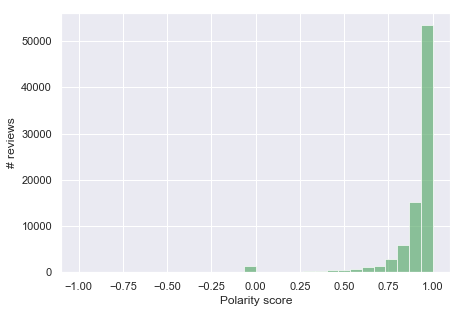

In [119]:
# Plot a distribution of positive and negative sentiment in review comments
plt.hist(reviews_sentiment_df.polarity_score, bins=30, color='g', alpha=0.65)
plt.xlabel('Polarity score')
plt.ylabel('# reviews')
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

Generally speaking, we see here a distribution highly skewed in favour of positive scores. The vast majority of review commentary seems to express strongly positive sentiment. If we bucket these scores, we can understand the numbers in each category in more detail.

In [120]:
# Print numbers in each category
reviews_sentiment_df['polarity_category'].value_counts()

strong_positive    76769
positive            5594
neutral             1331
negative             849
Name: polarity_category, dtype: int64

In [121]:
# Print a sample of strong positive reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'strong_positive']['comments'].sample(n = 100)

37786    I did not meet Kelly but our communication was perfect email, text, cellphone.\n\nUnit as listed the space is nice, bed was comfortable, tv service and desk with plenty of local information there,...
71856    Susan was awesome. We really enjoyed her and her dog who was also super pleasant and welcoming. The room was quite nice and quiet.  We didn't spend much time there during our 3-day stay but the te...
21253    The Plum apartment was perfect! The pictures do not do this place justice. The apartment is located in a great neighbourhood with many great restaurants at a walking distance. The few things left ...
40389    Host was very communicative through the Air BnB system before and during the visit - though we never met them personally (fine with us) there was a sense that they were available for questions/com...
14145    Roberta and Pat were very welcoming, helpful, and easygoing. Everything was exactly as described. We loved their place! The place is near downtown yet in a

In [122]:
# Print a sample of positive reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'positive']['comments'].sample(n = 100)

82840                                                                                                                         Very nice and conveniently located. True it's a bit loud, but earplugs solve that.
32188                                                           The apartment was well located and we could walk everywhere in Seattle easily. \nEverything worked well and was we needed for a base to explore.
17426    Alexandra was very accommodating with all the chaos around my delayed flight. She made the effort to drop keys off to me where I was. Her space was quiet and comfortable and in a very central loca...
31563    Desdemona's house is in a great neighborhood and had all the amenities listed and pictured. We didn't see Desdemona much but she was accommodating and flexible with check-in and check-out.  I real...
8346                                                                       Great location. Nice little guest house. I would stay here again. Did not run into the ow

In [123]:
# Print a sample of neutral reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'neutral']['comments'].sample(n = 100)

42235                                                                          The listing was accurate. We never saw our hosts as we were out most of the time. Therefore, didn't see much of the neighborhood.
39109    B&B agréable et bien placé, rapidement au centre en bus, et calme la nuit. Rachel possède de bonnes adresses, et parle le français. En fonction de la saison, quelques fruits et légumes offerts, ai...
12448                                                                                                                    The host canceled this reservation 5 days before arrival. This is an automated posting.
7433     Wir haben uns sogleich mit dem kleinen Häuschen angefreundet und 2 Nächte gut geschlafen. Samantha und ihr Mann waren sehr freundlich und zuvorkommend. Sie haben uns auch wertvolle Hilfe und Tipps...
38699                                                                                                                   The host canceled this reservation 24 days b

In [124]:
# Print a sample of neutral reviews
reviews_sentiment_df[reviews_sentiment_df.polarity_category == 'negative']['comments'].sample(n = 100)

75338    Wir haben und bei Stan und Carrie rundrum wohl gefühlt. Airbnb mag vielleicht auf einem Segelboot ein wenig ungewöhnlich sein, aber obwohl es natürlich etwas enger als in einer Wohnung war, hat un...
59659    Gavin's place suited our needs perfectly, as it is situated in a convenient location and was a short walk from where our family we were visiting live. It is right nearby the I-5, but we didn't fin...
29150    Es war sehr schön bei Eliza. Sie war eine ausgezeichnete Gastgeberin. Ich Haus war schön und sauber. Die Nachbarschaft war ruhig, es gab aber auch Einkaufsmöglichkeiten in der Nähe. Mit dem Bus wa...
49928    Very clean.  Seemed Quiet.  Close to downtown. There are 3 floors, lots of stairs, would be difficult for the elderly.  The garage is a little difficult to get in and out of due to the lay out, so...
64338    Wir haben die Gastgeberin nur kurz gesehen, aber es war trotzdem kein Problem mit dem check in. Das Appartment ist sauber und der Blick auf den Space Needl

We can see from our analysis and sampling of the data that the vast majority of review text sentiment is highly positive.

Where neutral reviews exist, they often reflect automated placeholder messages. Both in neutral and negative, some foreign-language text remains. If we were to perform more in-depth text analytics into neutral and negative sentiment, we would need to translate or remove these comments to treat them appropriately. 

### 4.2. How do localities vary in positive or negative sentiment in review descriptions?

Building on the above question, we'll explore here which neighbourhoods (if any) appear to generate disproportionately positive sentiment from guests. 

We'll review here the distribution of positive sentiment by locality, and observe how closely it mirrors the distribution of reviews by locality overall. We'll aim to identify which localities have the highest positive sentiment in Seattle when it comes to reviews. To do this, we're going to draw upon the 'neighbourhood_group_cleansed' definition of locality in the listings dataframe.

To begin with, we'll need to create a dataset that pulls relevant location data together with our review sentiment data.

#### 4.2.1 Data preparation

Here we need to do some further data preparation, beyond the general cleansing from section 3. Principally, we'll need to join the listings and review dataframes to append locality data to our review descriptions dataframes.

In [125]:
# Create simple base table to join onto
listings_reduced_df = listings_df[['id', 'neighbourhood_group_cleansed']].copy()
listings_reduced_df = listings_reduced_df.rename(columns={"id": "listing_id"})

# Join the dataframes together
review_location_df = reviews_sentiment_df.merge(listings_reduced_df, on='listing_id', how='left')

#### 4.2.2 Modelling

We do not need to perform significant additional modelling on the data set (beyond that covered in question 4.1). However, we do need to group our localities together to provide a view on median polarity scores for a given area.

In [126]:
# Create groups based on median polarity score and drop other columns
review_location_grouped_df = review_location_df.groupby(['neighbourhood_group_cleansed'], as_index=False).median()
del review_location_grouped_df['listing_id']
del review_location_grouped_df['id']
del review_location_grouped_df['reviewer_id']

#### 4.2.3 Evaluation

Here we'll display median polarity scores by locality, and display the distribution of these scores in a box plot.

In [127]:
# Sort the localities by polarity_score and then group
review_location_grouped_df.sort_values('polarity_score', inplace=True, ascending=False)
review_location_grouped_df

,neighbourhood_group_cleansed,polarity_score
7,Interbay,0.9603
12,Queen Anne,0.9588
0,Ballard,0.9585
16,West Seattle,0.9585
11,Other neighborhoods,0.9578
14,Seward Park,0.9569
9,Magnolia,0.9565
3,Cascade,0.9560
4,Central Area,0.9559
13,Rainier Valley,0.9543


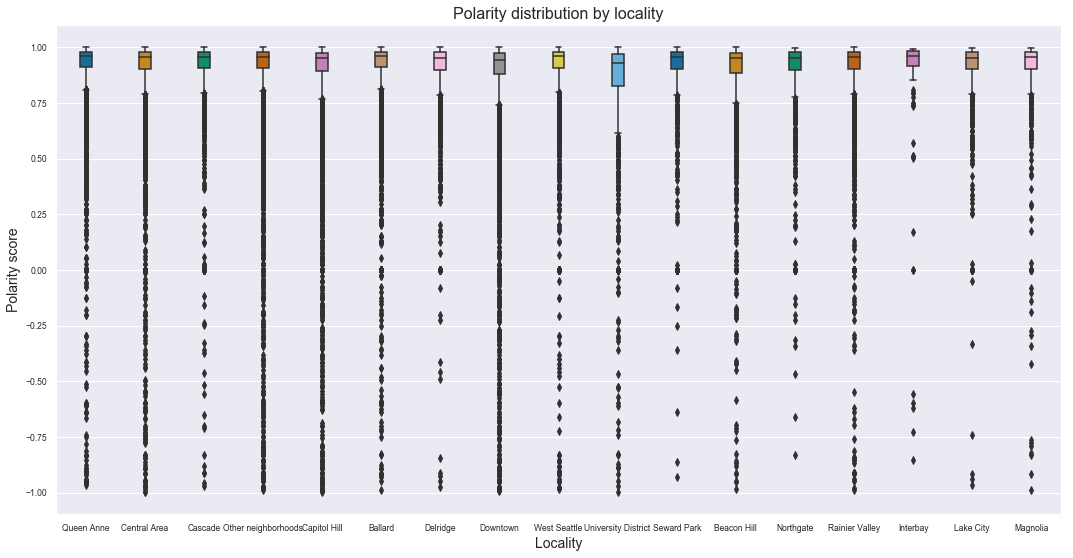

In [128]:
# Set dimension parameters
sns.set(rc={'figure.figsize':(18,9)})

# Instantiate basic plot
polarity_boxplot = sns.boxplot(y='polarity_score', x='neighbourhood_group_cleansed', 
                 data=review_location_df, 
                 width=0.2,
                 palette="colorblind")

# Amend visual parameters
polarity_boxplot.axes.set_title("Polarity distribution by locality",
                    fontsize=16)
polarity_boxplot.set_xlabel("Locality", 
                fontsize=14)
polarity_boxplot.set_ylabel("Polarity score",
                fontsize=14)
polarity_boxplot.tick_params(labelsize=8.5)

So far we can see some marginal differences in mean polarity score by locality. 

Visualizing these as a boxplot at first looks strange (with huge long tails outside the IQR), but in fact it is not surprising: the distribution of polarity is simply very, very narrow toward the positive score across the board - with a very long tail of less positive sentiment thereafter.

So far we can see most localities generate polarity scores of >0.95. However, Downtown and the University District are notably lower than this, suggesting that perhaps they're less favourable to guests staying there. 

That said, it's hard to say how meaningful these differences are. All of the distributions overlap, suggesting the differences are not necessarily significant ones.

### 4.3. Which features are most predictive of positive review scores?

We've so far looked at quite targeted questions related to review sentiment. We're now going to broaden our analysis, and look at which features are most predictive of positive review scores overall. 

We'll first prepare our feature list, and second build a model. We'll look to extract the coefficients of this model to understand what features are more or less predictive of a positive review outcome. 

#### 4.3.1 Data preparation

We'll need to do quite significant additional preparation to ready our data for modelling.

For this analysis we'll focus on the listings dataframe, and make use of the review scores it contains for properties visited.

Our target variable will be the review_scores_rating. We remove other review scores, and remove features that we won't opt to use, which includes:
- Name: Not relevant for a statistical model (unless we attempted to e.g. mine it for text features)
- Description: As above
- Experiences offered: Almost all list 'none', making it a relatively impractical variable for analysis
- Host_since: Not relevant to property itself
- Host_location: Not directly relevant (though we could in future create a feature based on e.g. whether a host resides in the same locality as the listed property)
- Host_listings_count: We'll use host_total_listings_count instead
- Host_has_profile_pic: Not relevant to property itself
- Host_identity_verified: Not relevant to property itself
- Street: We'll use the same locality feature as in 4.2 instead
- Neighbourhood_cleaned: As above
- City: Uniform for all
- State: Uniform for all
- Market: Uniform for all
- Smart_location: Uniform for all
- Country_code: Uniform for all
- Country: Uniform for all
- Latitude: We'll use the same locality feature as in 4.2 instead
- Longitude: We'll use the same locality feature as in 4.2 instead
- Is_location_exact: We'll use the same locality feature as in 4.2 instead
- Accommodates: Not really a relevant comparison point
- Bathrooms: Again, likely to be noisy as will simply vary by property size (a ratio of rooms to bathrooms may be an interesting feature for future analysis)
- Bedrooms: As above
- Beds: As above
- Bed_type: As above
- Guests_included: As above
- Extra_people: As above
- Minimum_nights: As above
- Maximum_nights: As above
- Calendar_updated: Mostly just a metadata value
- Has_availability and other availability measures: Mostly just a metadata value
- Calendar_last_scraped: As above
- First_review: Not relevant, as we'll use time since first listing instead to establish age
- Last_review: Mostly just a metadata value
- Most review scores: We'll use review_scores_rating instead
- Jurisdication_names: Uniform
- Instant_bookable: Not relevant to property itself
- Cancellation_policy: Not relevant to property itself
- Require_guest_profile_picture: Not relevant to property itself
- Require_guest_phone_verification: Not relevant to property itself
- Calculated_host_listings_count: We'll use host listings count instead
- Price frequency: Not relevant to property itself
- Verification options: Not relevant to property itself

In [129]:
# Extract the variables we want for analysis
listings_review_df = listings_df[['id', 'host_response_time', 'host_response_rate', 'host_acceptance_rate',
                                  'host_is_superhost', 'host_total_listings_count', 'property_type',
                                  'room_type', 'price', 'number_of_reviews', 'reviews_per_month',
                                  'square_feet_present', 'security_deposit_present', 'notes_present',
                                  'neighborhood_overview_present', 'transit_present', 'host_about_present',
                                  'space_present', 'summary_present', 'cleaning_fee_present',
                                  'Kitchen_Present', 'TV_Present', 'Internet_Present', 'AirCon_Present',
                                  'Parking_Present', 'Pool_Present', 'Wheelchair_Access_Present', 'Washer_Present',
                                  'Dryer_Present', 'review_scores_rating']].copy()

In [130]:
# One-hot encode three variables where it's appropriate to do so
listings_review_df = pd.get_dummies(listings_review_df, prefix=['host_response_time', 'property_type', 'room_type'],
                                   columns=['host_response_time', 'property_type', 'room_type'])

In [131]:
# Standardize encoding of binary variables to 0 & 1
listings_review_df['host_is_superhost'] = listings_review_df.host_is_superhost.map(dict(t=1, f=0))
listings_review_df = listings_review_df.applymap(lambda x: 1 if x == True else x)
listings_review_df = listings_review_df.applymap(lambda x: 0 if x == False else x)

In [132]:
# Convert dollar value on price to float
listings_review_df['price'] = listings_review_df['price'].str.replace(',', '')
listings_review_df['price'] = listings_review_df['price'].str.replace('$', '')
listings_review_df['price'] = listings_review_df['price'].astype(float)

#### 4.3.2 Modelling

We've now created a list of features we'd like to use, and prepared them in such a way that we can relatively easily feed them into a model to be trained and made use of. We'll now move on to model the data as if we were building a predictive model for real. In this case, however, we're primarily interested in using the model for <em>descriptive</em> purposes, i.e. to extract the features that appear strongest in training.

We'll train a simple linear regression model for this purpose, use model selection strategies to reduce the variable count, and then review the strongest coefficients. We use a lasso model to penalize complexity, given the high number of variables here.

In [133]:
# Split the data into training, validation, and testing groups
train_df, test_df = train_test_split(listings_review_df, test_size = 0.2)
validation_df, test_df = train_test_split(test_df, test_size = 0.5)

In [134]:
# Select target variable
Y_Train = train_df.iloc[:, 26]
Y_Validation = validation_df.iloc[:, 26]

# Filter training variables
X_Train = train_df.drop('id', axis=1)
X_Train = X_Train.drop('review_scores_rating', axis=1)
X_Validation = validation_df.drop('id', axis=1)
X_Validation = X_Validation.drop('review_scores_rating', axis=1)

In [135]:
# Instantiate the model and train it
clf = Lasso(alpha=0.1)
clf.fit(X_Train, Y_Train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

#### 4.3.3 Evaluation

Lastly, we'll evaluate our output - notably the trained model's coefficients - to answer our intial question.

In [136]:
# Create df
coefficients = pd.concat([pd.DataFrame(X_Train.columns),pd.DataFrame(np.transpose(clf.coef_))], axis = 1)

In [137]:
# Sort df
coefficients.columns = ['feature','coefficient']
coefficients.sort_values('coefficient', inplace=True, ascending=False)
coefficients

,feature,coefficient
2,host_is_superhost,3.036187
28,host_response_time_within an hour,0.688643
19,AirCon_Present,0.478003
20,Parking_Present,0.413184
17,TV_Present,0.190568
6,reviews_per_month,0.077263
4,price,0.003506
36,property_type_Condominium,-0.000000
30,property_type_Bed & Breakfast,0.000000
31,property_type_Boat,0.000000


Based on this assessment, the most important features associated with high ratings are:
- Whether a host is a superhost
- Whether a host has an 'about' section
- Whether a host responds quickly
- Whether parking is present
- Whether a TV is present
- Whether aircon is present

The factor most negatively associated with review scores is whether a security deposit is present. Following this, the next most important negative factor is property_type_apartment, perhaps indicating that guests tend to respond more positively to bookings in houses. Slow host response times are also perceived negatively. 